# Bioestadística: Tarea 5
###### **Uriel Isaac Alvarez Cardenas**

1. Construir la grafica de la funcion de potencia para la siguiente situaciones:

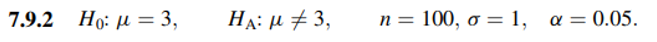

**Para la cola superior**

In [1]:
nrm_pwr1 <- function(n = 30, 
                     alpha = .05,
                     H0 = 0, 
                     H1 = 2, 
                     sig = 1) {
  
  # Find the z_critical value
  z_alpha <- qnorm(p = alpha, 
                   mean = 0, 
                   sd = 1, 
                   lower.tail = FALSE)
  # Find the ybar_critical value
  y_bar_cv <- z_alpha*(sig/sqrt(n)) + H0
  
  # Calculate the power under H1.
  power <- pnorm(q = y_bar_cv, 
                 mean = H1, 
                 sd = sig/sqrt(n), 
                 lower.tail = FALSE)
  # Report the power.
  power
}
# Code from https://rpubs.com/janetnanzi/325993

In [2]:
pcurvH1.10 <- lapply(X = seq(3,6,0.01), 
                     FUN = nrm_pwr1, 
                     n=100, alpha = .05, H0 = 3, sig =1)

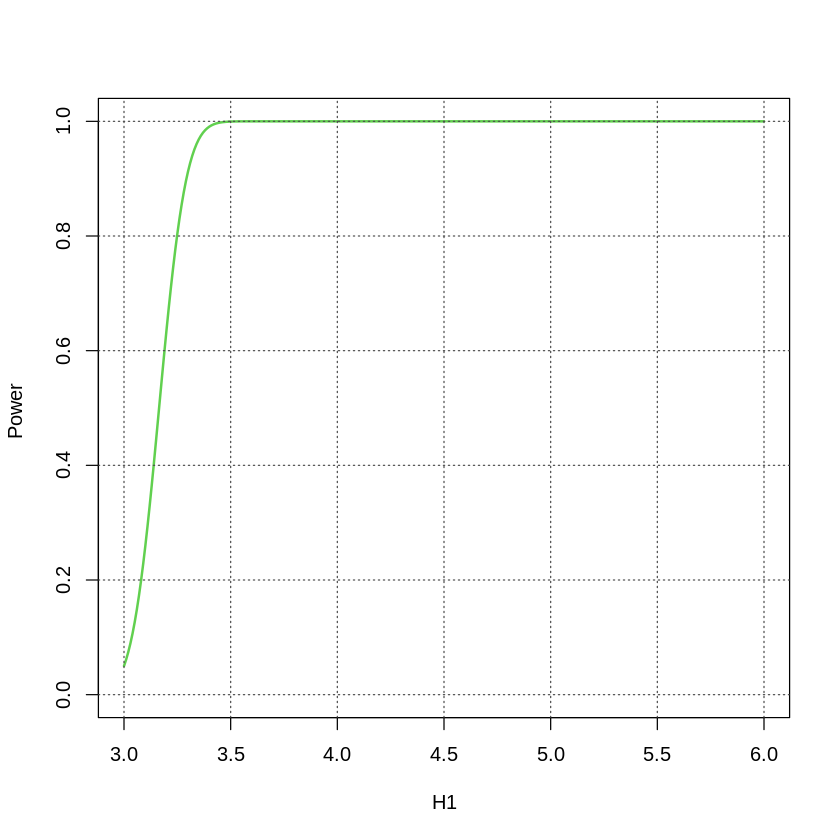

In [3]:
plot(x = seq(3,6,0.01), y = pcurvH1.10, type = "l", 
     xlab = expression(paste(H1)), ylim = c(0,1),
     ylab = expression(paste("Power ")),
     col = 3, lwd = 2)
     
grid(col = gray(.3))

**Para la cola inferior**

In [4]:
nrm_pwr2 <- function(n = 30, 
                     alpha = .05,
                     H0 = 0, 
                     H1 = 2, 
                     sig = 1) {
  
  # Find the z_critical value
  z_alpha <- qnorm(p = alpha, 
                   mean = 0, 
                   sd = 1, 
                   lower.tail = TRUE
                   )
  # Find the ybar_critical value
  y_bar_cv <- z_alpha*(sig/sqrt(n)) + H0
  
  # Calculate the power under H1.
  power <- pnorm(q = y_bar_cv, 
                 mean = H1, 
                 sd = sig/sqrt(n), 
                 lower.tail = TRUE
                 )
  # Report the power.
  power
}

In [5]:
pcurvH1.20 <- lapply(X = seq(0,3-.01,0.01), 
                     FUN = nrm_pwr2, 
                     n=100, alpha = .05, H0 = 3, sig =1)

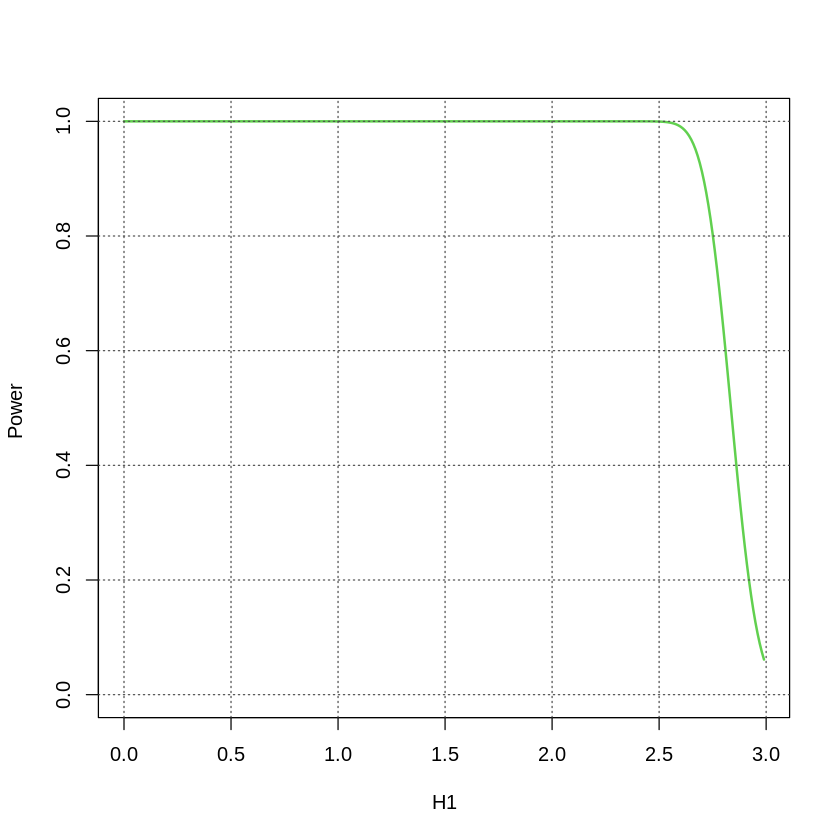

In [6]:
plot(x = seq(0,3-.01,0.01), y = pcurvH1.20, type = "l", 
     xlab = expression(paste(H1)), ylim = c(0,1),
     ylab = expression(paste("Power ")),
     col = 3, lwd = 2)


grid(col = gray(.3))

**Analisis a dos colas**

In [7]:
rnr_pwr2 <- function(n = 30, 
                     alpha = .05,
                     H0 = 0, 
                     H1 = 2, 
                     sig = 1) {
  
  # Find the z_critical value
  z_alpha_half <- qnorm(p = alpha/2, 
                        mean = 0, 
                        sd = 1, 
                        lower.tail = FALSE)
  
  # Find the ybar_critical value
  y_bar_cv1 <- z_alpha_half*(sig/sqrt(n)) + H0
  y_bar_cv2 <- -z_alpha_half*(sig/sqrt(n)) + H0
  # Calculate the power under H1.
  power <- pnorm(q = y_bar_cv1, 
                 mean = H1, 
                 sd = sig/sqrt(n), 
                 lower.tail = FALSE)+
    pnorm(q = y_bar_cv2, 
          mean = H1, 
          sd = sig/sqrt(n), 
          lower.tail = TRUE)
  # Report the power.
  power
}

In [8]:
dosColas <- lapply(X = seq(0,6,0.01), 
                     FUN = rnr_pwr2, 
                     n=100, alpha = .05, H0 = 3, sig =1)

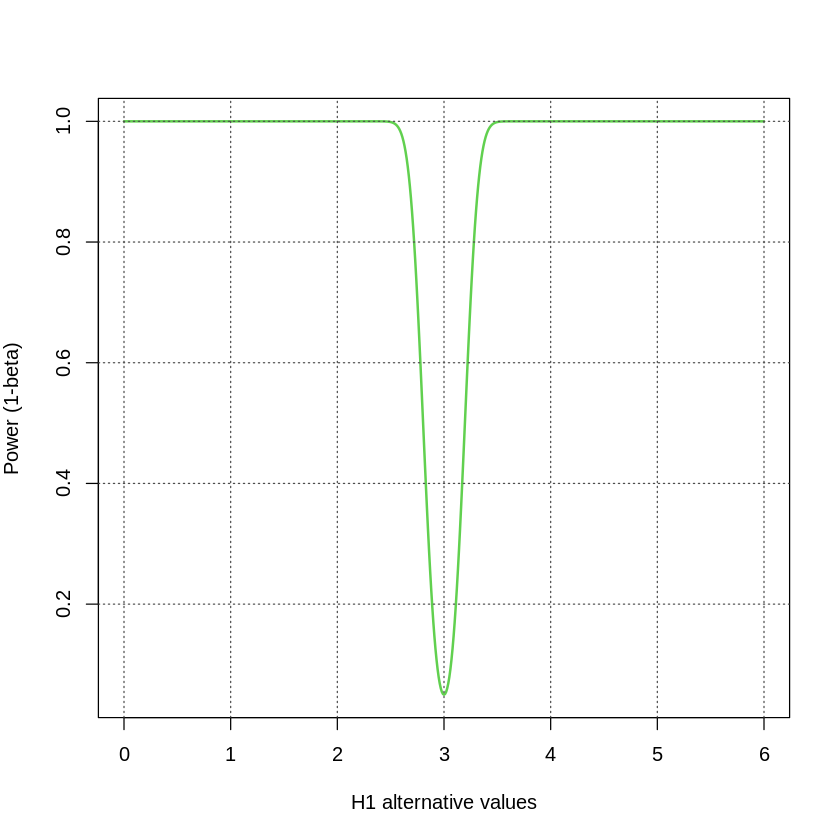

In [9]:
plot(x = seq(0,6,0.01), y = dosColas, type = "l", 
     xlab = expression(paste("H1 alternative values")),
     ylab = expression(paste("Power (1-beta)")),
     col = 3, lwd = 2)

grid(col = gray(.3))

# conclusion 
Aunque sólo un valor de 𝛼 está asociado con una prueba de hipótesis dada, existen muchos valores de 𝛽, una para cada valor posible de 𝜇 si 𝜇_0 no es el valor real para el supuesto valor de 𝜇.

#### Ejemplo 7.9.2 Biostatistics, Wayne
(no estaba en la tarea pero sirve para ejemplificar un caso para cola izquierda)

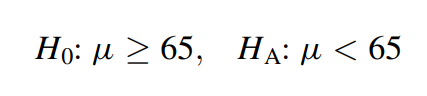

In [10]:
pcurvLower <- lapply(X = seq(45,65,0.1), 
                     FUN = nrm_pwr2, 
                     n=20, alpha = .01, H0 = 65, sig =15)

In [11]:
Cvaule_low <- function(n = 30, 
                     alpha = .05,
                     H0 = 0, 
                     H1 = 2, 
                     sig = 1) {
  
  # Find the z_critical value
  z_alpha <- qnorm(p = alpha, 
                   mean = 0, 
                   sd = 1, 
                   lower.tail = TRUE
                   )
  # Find the ybar_critical value
  y_bar_cv <- H0 + z_alpha*(sig/sqrt(n)) 
  
  y_bar_cv
}

In [12]:
Cvaule_Up <- function(n = 30, 
                    alpha = .05,
                    H0 = 0, 
                    H1 = 2, 
                    sig = 1) {
  
  # Find the z_critical value
  z_alpha <- qnorm(p = alpha, 
                  mean = 0, 
                  sd = 1, 
                  lower.tail = FALSE
                  )
  # Find the ybar_critical value
  y_bar_cv <- H0 + z_alpha*(sig/sqrt(n)) 
  
  y_bar_cv
}


In [13]:
v_crit_low <- lapply(X = 0, 
                     FUN = Cvaule_low, 
                     n=20, alpha = .01, H0 = 65, sig =15)

In [14]:
v_crit_low

[[1]]
[1] 57.19719

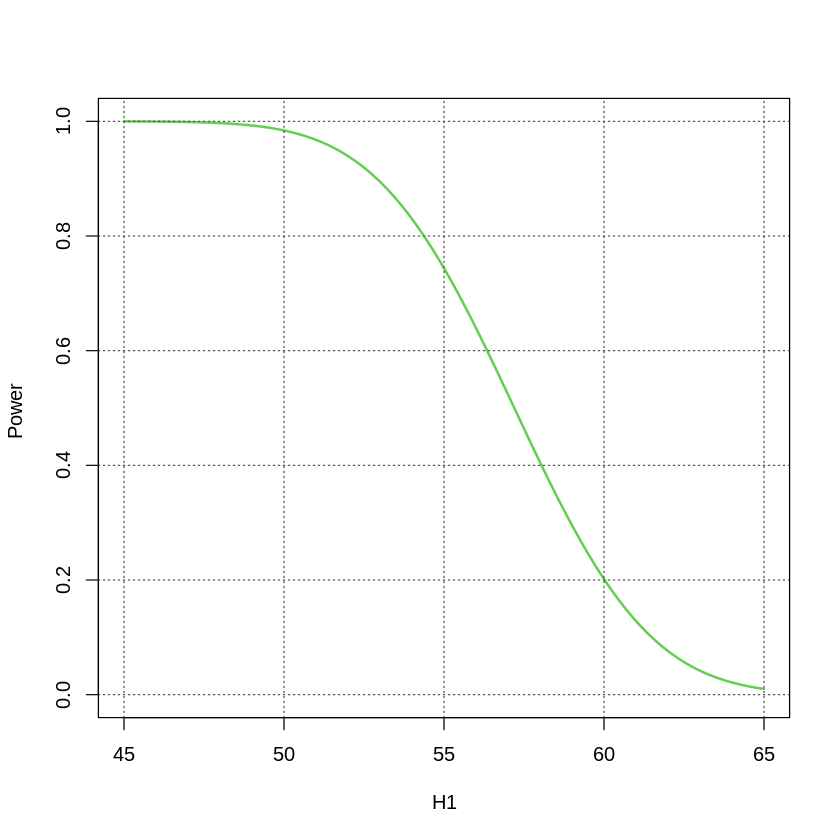

In [15]:
plot(x = seq(45,65,0.1), y = pcurvLower, type = "l", 
     xlab = expression(paste(H1)), ylim = c(0,1),
     ylab = expression(paste("Power ")),
     col = 3, lwd = 2)
grid(col = gray(.3))

Ahora para el caso en el que conocemos la verdadera media:

In [16]:
alpha = .01
beta = .05
H0 = 65
H1 = 55
sig = 15

In [17]:
N_vaule <- function( alpha = .01,
                    beta = .05,
                    H0 = 65,
                    H1 = 55,
                    sig = 15){
  
   z0 <- abs(qnorm(alpha))

   z1 <- abs(qnorm(beta))
   
   N <- ((z0 + z1)*(sig)/(H0 - H1))^2
  
  ceiling(N)
}

In [18]:
n <- N_vaule(alpha, beta, H0, H1, sig)
n

[1] 36

In [19]:
v_reject <- lapply(X = 0, 
                     FUN = Cvaule_low, 
                     alpha = .01,
                     H0 = 65,
                     sig = 15,
                     n = 36)
v_reject

[[1]]
[1] 59.18413

In [20]:
vn_reject <- lapply(X = 0, 
                     FUN = Cvaule_Up, 
                     alpha = .05,
                     H0 = 55,
                     sig = 15,
                     n = 36)
vn_reject

[[1]]
[1] 59.11213

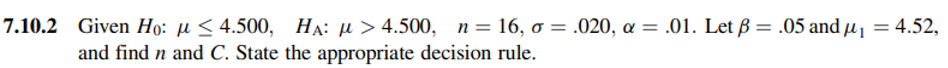

In [21]:
alpha = .01
beta = .05
H0 = 4.5
H1 = 4.52
sig = .020

In [22]:
n <- N_vaule(alpha, beta, H0, H1, sig)
n

[1] 16

In [23]:
v_reject <- lapply(X = 0, 
                     FUN = Cvaule_low, 
                     alpha = alpha,
                     H0 = H0,
                     sig = sig,
                     n = n)
v_reject

[[1]]
[1] 4.488368

In [24]:
vn_reject <- lapply(X = 0, 
                     FUN = Cvaule_Up, 
                     alpha = beta,
                     H0 = H1,
                     sig = sig,
                     n = n)
vn_reject

[[1]]
[1] 4.528224

In [25]:
pcurvH1.10 <- lapply(X = seq(4.4,4.6,0.01), 
                     FUN = nrm_pwr1, 
                     n=n, alpha = alpha, H0 = H0, sig =sig)

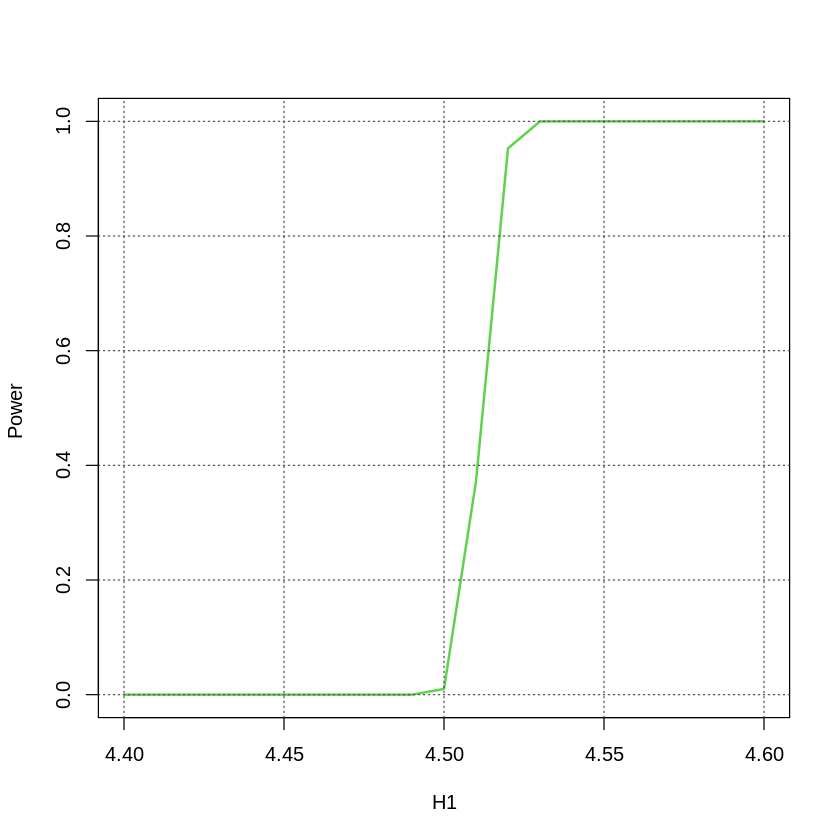

In [26]:
plot(x = seq(4.4,4.6,0.01), y = pcurvH1.10, type = "l", 
     xlab = expression(paste(H1)), ylim = c(0,1),
     ylab = expression(paste("Power ")),
     col = 3, lwd = 2)
grid(col = gray(.3))

# Conclusion 

Si seleccionamos una muestra de tamaño 16 y calculamos la media, 

si 𝜇 <= 4.48, rechazamos H0. Si 𝜇 > 4.52, no rechazamos H